# Chapter2 Demonstration7

Data : ```m-deciles08.txt```

Page 88

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the data
da = pd.read_csv('./data/m-deciles08.txt', delim_whitespace=True, header=0, index_col=0)
da

,CAP1RET,CAP2RET,CAP9RET,CAP10RET
date,,,,
19700130,0.054383,-0.004338,-0.073082,-0.076874
19700227,0.020264,0.020155,0.064185,0.059512
19700331,-0.031790,-0.028090,-0.004034,-0.001327
19700430,-0.184775,-0.193004,-0.115825,-0.091112
19700529,-0.088189,-0.085342,-0.085565,-0.053193
...,...,...,...,...
20080829,-0.000183,-0.012646,0.017067,0.005598
20080930,-0.112060,-0.132327,-0.121940,-0.086404
20081031,-0.126414,-0.129844,-0.226203,-0.177655


In [4]:
# Extract the first decile (d1)
d1 = da.iloc[:, 1]
d1

date
19700130   -0.004338
19700227    0.020155
19700331   -0.028090
19700430   -0.193004
19700529   -0.085342
              ...   
20080829   -0.012646
20080930   -0.132327
20081031   -0.129844
20081128   -0.114484
20081231   -0.022210
Name: CAP2RET, Length: 468, dtype: float64

In [5]:
# Create January dummy variable
jan = np.tile(np.concatenate(([1], np.zeros(11))), 39)
jan

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [6]:
# Perform linear regression with January dummy
X = sm.add_constant(jan)  # Adds a constant term to the predictor
m1 = sm.OLS(d1, X).fit()
# Print the summary of the linear regression model
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:                CAP2RET   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     67.26
Date:                Mon, 15 Jan 2024   Prob (F-statistic):           2.34e-15
Time:                        23:42:28   Log-Likelihood:                 644.20
No. Observations:                 468   AIC:                            -1284.
Df Residuals:                     466   BIC:                            -1276.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0035      0.003      1.187      0.2

In [7]:
# Fit ARIMA model (1,0,0)x(1,0,1)[12] without including the mean
m2 = ARIMA(d1, order=(1,0,0), seasonal_order=(1,0,1,12), trend='n').fit()

# Print the summary of the ARIMA model
print(m2.summary())

/Users/laptop/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/laptop/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/laptop/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                            CAP2RET   No. Observations:                  468
Model:             ARIMA(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                 642.620
Date:                            Mon, 15 Jan 2024   AIC                          -1277.239
Time:                                    23:42:35   BIC                          -1260.645
Sample:                                         0   HQIC                         -1270.710
                                            - 468                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2007      0.037      5.404      0.000       0.128       0.273
ar.S.L12       0.9891      0.011   

In [10]:
# Diagnostic checking using ACF and PACF plots
acf_vals = acf(m2.resid)
pacf_vals = pacf(m2.resid)

NameError: name 'plt' is not defined

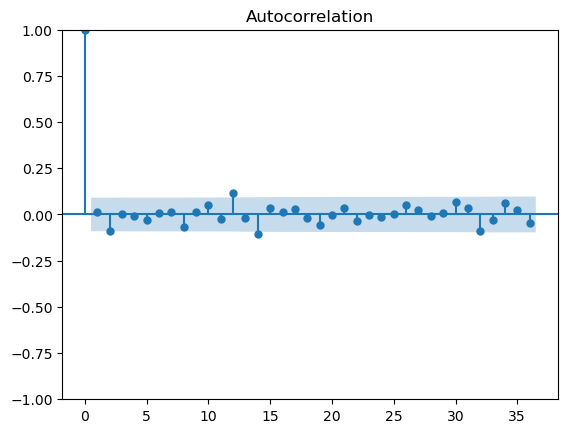

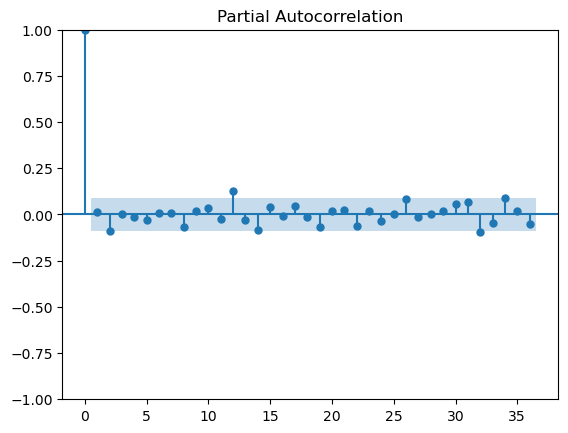

In [11]:
# Plot ACF and PACF
plot_acf(m2.resid, lags=36)
plot_pacf(m2.resid, lags=36)
plt.show()